In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#overview
charging_data = pd.read_csv('charging_data.csv')
charging_data.head()

,Unnamed: 0,betreiber,art_der_ladeeinrichung,anzahl_ladepunkte,anschlussleistung,steckertypen1,steckertypen2,steckertypen3,steckertypen4,p1_kw,...,p4_kw,kreis_kreisfreie_stadt,ort,postleitzahl,strasse,hausnummer,adresszusatz,inbetriebnahmedatum,breitengrad,laengengrad
0,0,GGEW AG,Normalladeeinrichtung,1,4.6,AC Steckdose Typ 2,NaN,NaN,NaN,4.6,...,NaN,Landkreis Bergstraße,Lorsch,64653,Klosterstr.,23,NaN,2017-01-02,49.653064,8.572109
1,1,Pfalzwerke AG,Schnellladeeinrichtung,2,75.0,AC Steckdose Typ 2,DC Kupplung Combo,NaN,NaN,22.0,...,NaN,Landkreis Bergstraße,Lorsch,64653,Nibelungenstraße,135-137,NaN,2021-04-27,49.652969,8.554764
2,2,ENTEGA Energie GmbH,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Landkreis Bergstraße,Fürth,64658,Krumbacher Str.,39,NaN,2017-11-21,49.658037,8.787881
3,3,Entega Plus GmbH,Normalladeeinrichtung,2,22.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Landkreis Bergstraße,Fürth,64658,Erbacher Str.,102,a,2022-04-08,49.663670,8.796830
4,4,Entega Plus GmbH,Normalladeeinrichtung,2,22.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Landkreis Bergstraße,Fürth,64658,Schulstr.,12,NaN,2022-04-08,49.646360,8.781410


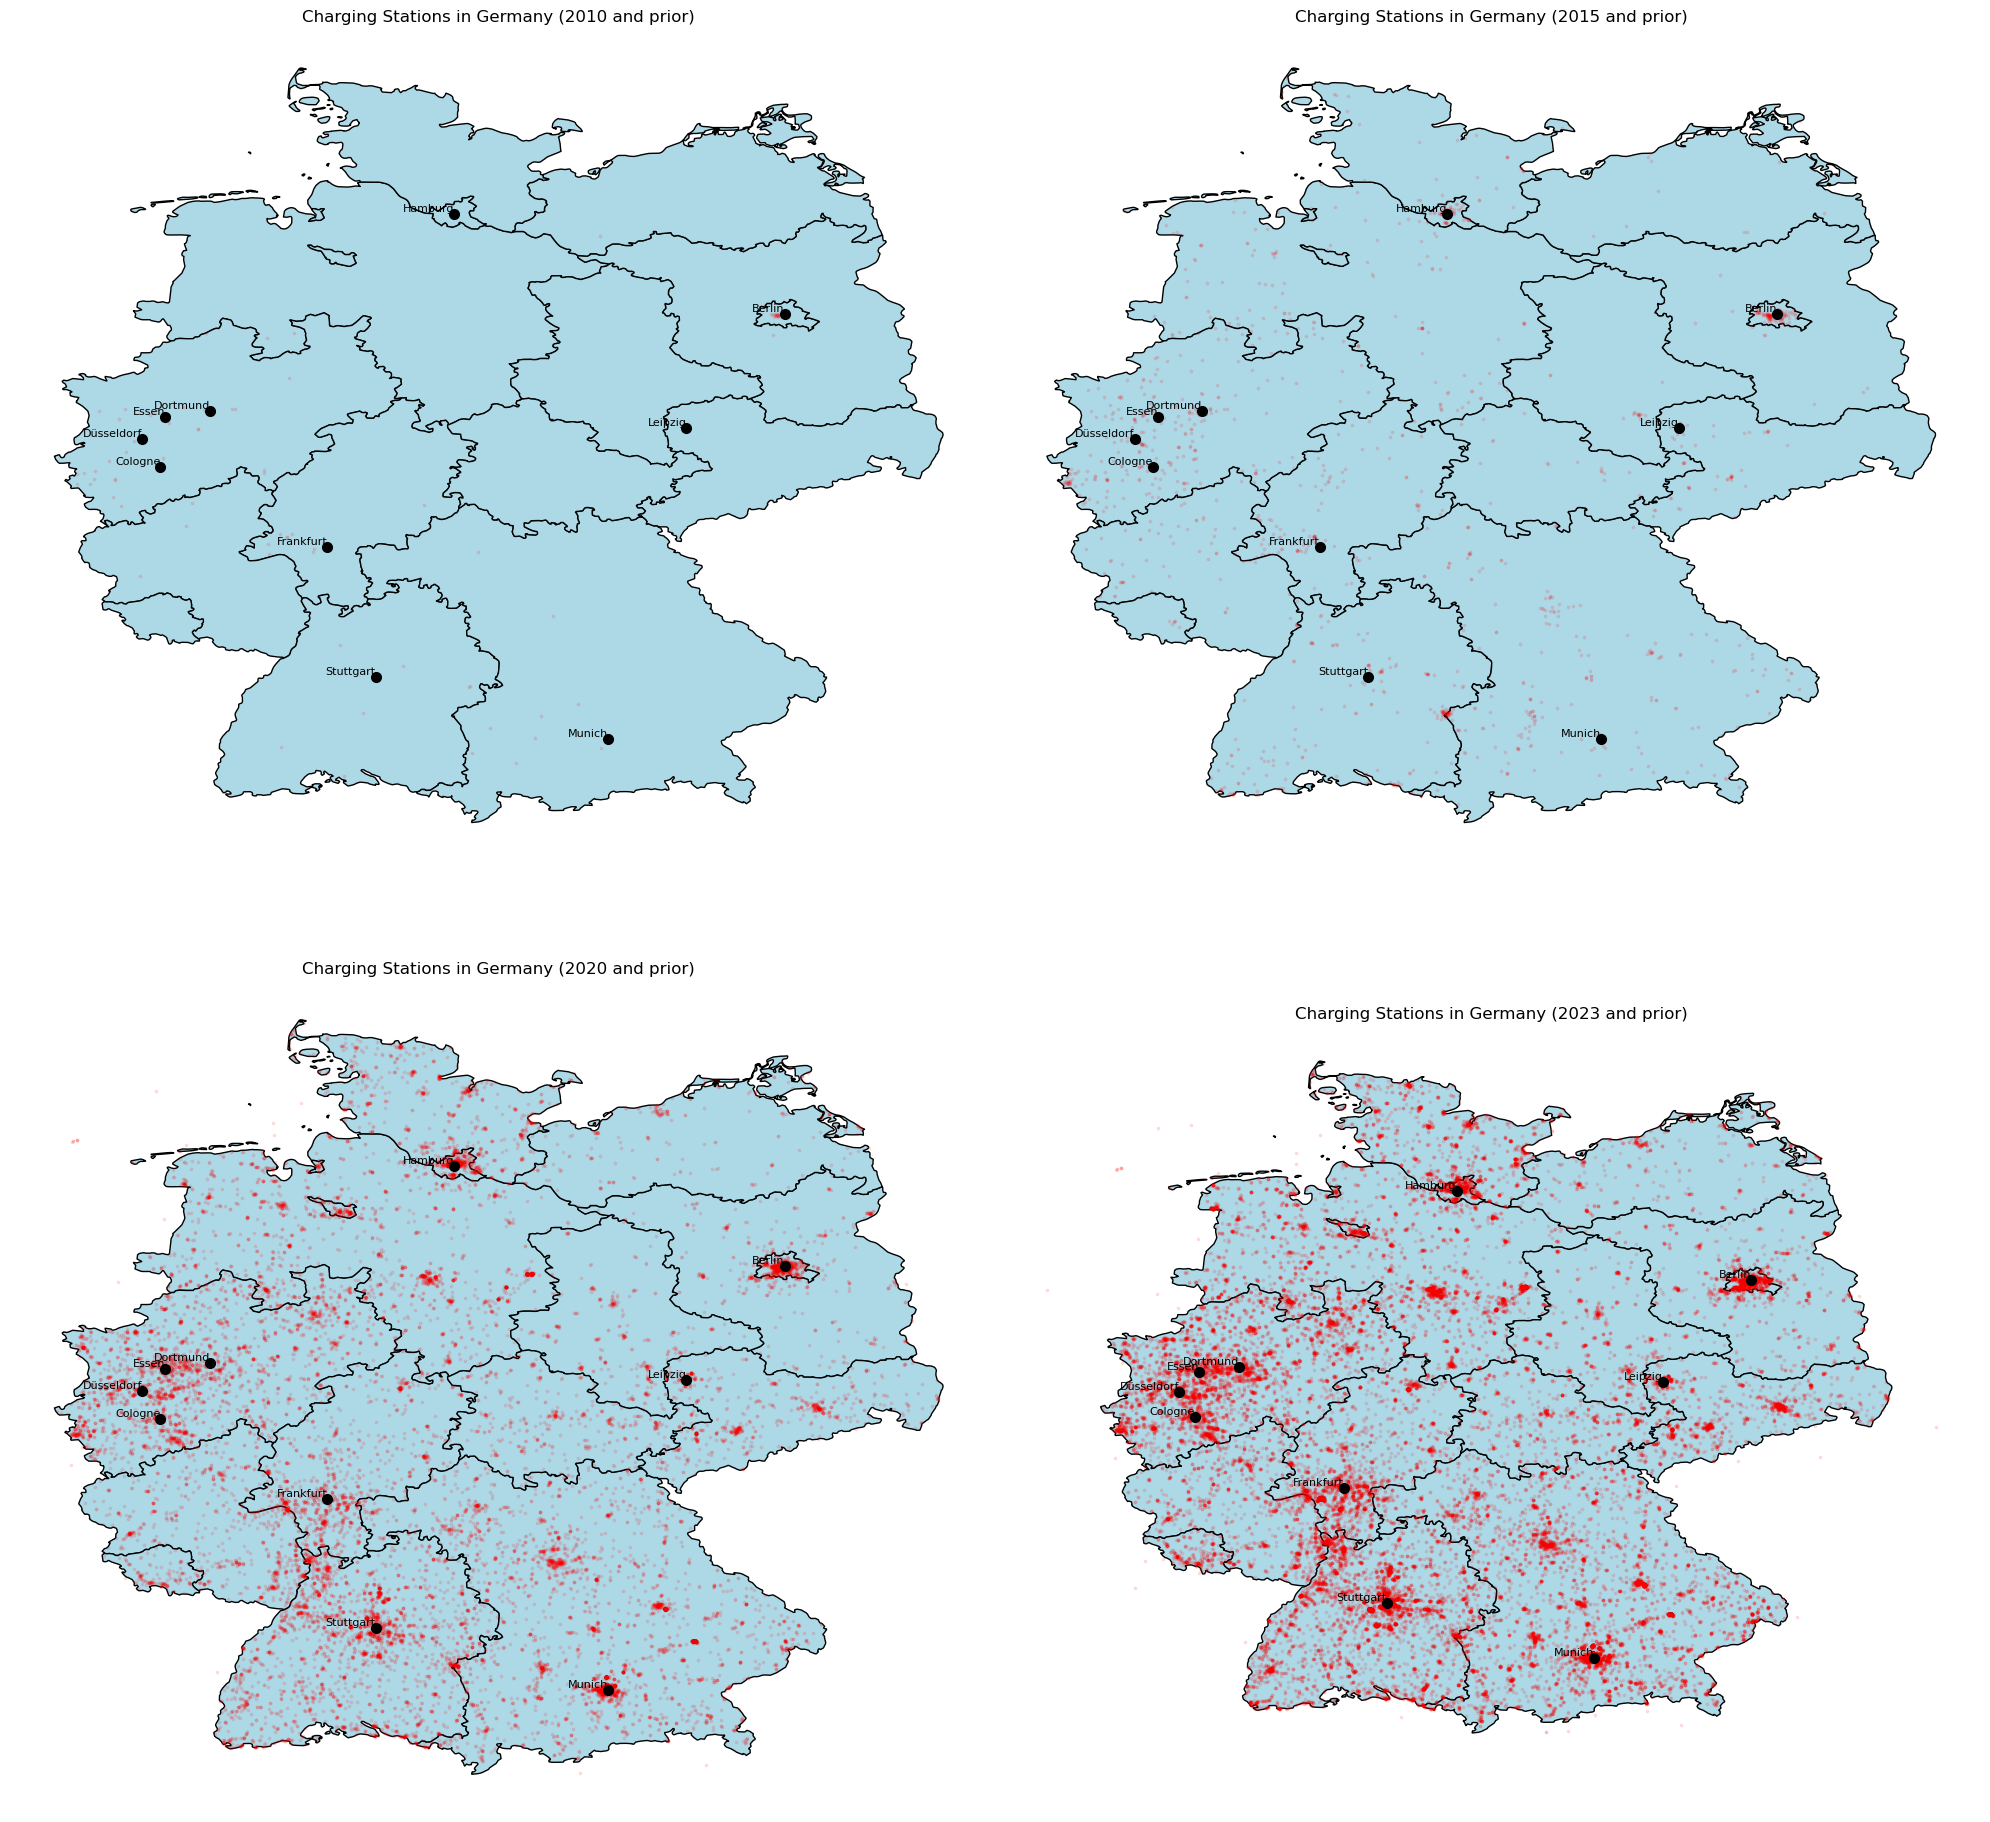

In [3]:
#Shapefile GER (Bundesländer)
GER_map = gpd.read_file('vg2500_bld.shp')

#read csv file charging data
charging_data = pd.read_csv('charging_data.csv')

# Convert column to datetime
charging_data['inbetriebnahmedatum'] = pd.to_datetime(charging_data['inbetriebnahmedatum'])

# Subplots (2 rows / 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# create for-loop to generate map for years 2010, 2015, 2020 and 2023 (and prior) using 2x2 grid
for i, year in enumerate([2010, 2015, 2020, 2023]):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    # Filter - specific year
    charging_data_before_year = charging_data[charging_data['inbetriebnahmedatum'].dt.year <= year]
    
    # Convert to GeoDataFrame-Format
    charging_geodf_year = gpd.GeoDataFrame(charging_data_before_year, geometry=gpd.points_from_xy(charging_data_before_year.laengengrad, charging_data_before_year.breitengrad))
    
    # Plotting GER map
    GER_map.plot(ax=ax, color='lightblue', edgecolor='black')
    
    # Plot charging stations (geodf)
    charging_geodf_year.plot(ax=ax, color='red', markersize=3, alpha=0.1)
    
    # Definition (coordinates) GER 10 largest cities
    cities = {
    'Berlin': (13.4049, 52.5200),
    'Hamburg': (9.9937, 53.5511),
    'Munich': (11.5819, 48.1351),
    'Cologne': (6.9603, 50.9375),
    'Frankfurt': (8.6821, 50.1109),
    'Stuttgart': (9.1829, 48.7758),
    'Düsseldorf': (6.7735, 51.2277),
    'Dortmund': (7.4686, 51.5136),
    'Essen': (7.0117, 51.4556),
    'Leipzig': (12.3874, 51.3438) }
    
    # Plotting top 10 largest cities GER
    for city, coords in cities.items():
        ax.plot(coords[0], coords[1], marker='o', color='black', markersize=7)
        ax.text(coords[0], coords[1], city, fontsize=8, ha='right', va='bottom')
    
    # Title and disable axis
    ax.set_title(f'Charging Stations in Germany ({year} and prior)')
    ax.axis('off')

# Plotting all four maps in one 
plt.tight_layout()

# Show plots
plt.show()


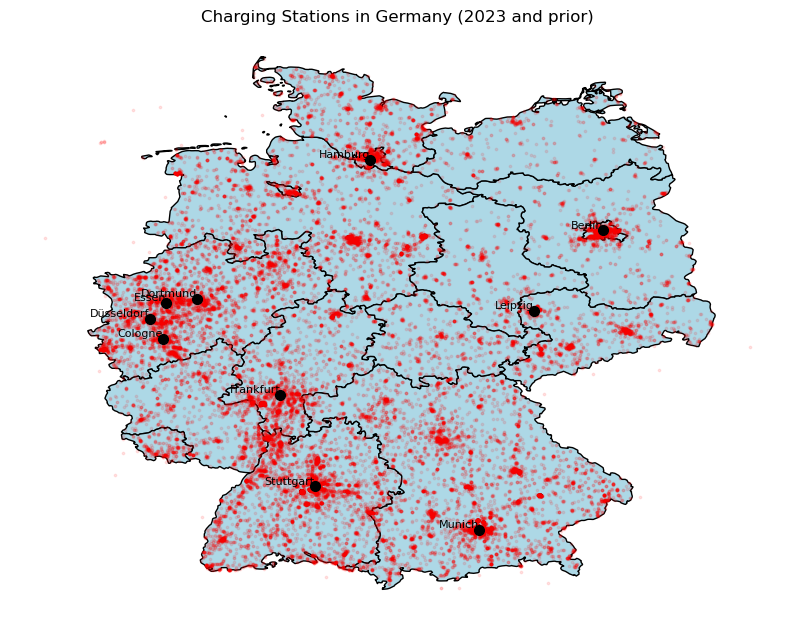

In [4]:
# Heatmap GER: 2023 and before #


#Shapefile Germany (Bundesländer)
GER_map = gpd.read_file('vg2500_bld.shp')

#read csv file charging data
charging_data = pd.read_csv('charging_data.csv')

# Convert column to datetime-Format
charging_data['inbetriebnahmedatum'] = pd.to_datetime(charging_data['inbetriebnahmedatum'])

# Filter: Data before and in 2023
charging_data_before_2023 = charging_data[charging_data['inbetriebnahmedatum'].dt.year <= 2023]

# Convert column to GeoDataFrame-Format
charging_geodf = gpd.GeoDataFrame(charging_data_before_2023, geometry=gpd.points_from_xy(charging_data_before_2023.laengengrad, charging_data_before_2023.breitengrad))

# Fisize and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 100))

# Plot GER map
GER_map.plot(ax=ax, color='lightblue', edgecolor='black')

# Definition GER 10 largest cities
cities = {
    'Berlin': (13.4049, 52.5200),
    'Hamburg': (9.9937, 53.5511),
    'Munich': (11.5819, 48.1351),
    'Cologne': (6.9603, 50.9375),
    'Frankfurt': (8.6821, 50.1109),
    'Stuttgart': (9.1829, 48.7758),
    'Düsseldorf': (6.7735, 51.2277),
    'Dortmund': (7.4686, 51.5136),
    'Essen': (7.0117, 51.4556),
    'Leipzig': (12.3874, 51.3438)
}

# Reduce alpha to increase visibility and prevent overplotting
charging_geodf.plot(ax=ax, color='red', markersize=3, alpha=0.1)

# Plotting GER 10 largest cities
for city, coords in cities.items():
    ax.plot(coords[0], coords[1], marker='o', color='black', markersize=7)
    ax.text(coords[0], coords[1], city, fontsize=8, ha='right', va='bottom')

# Title and disable axis
plt.title('Charging Stations in Germany (2023 and prior)')
ax.axis('off')

# Show heat map
plt.show()


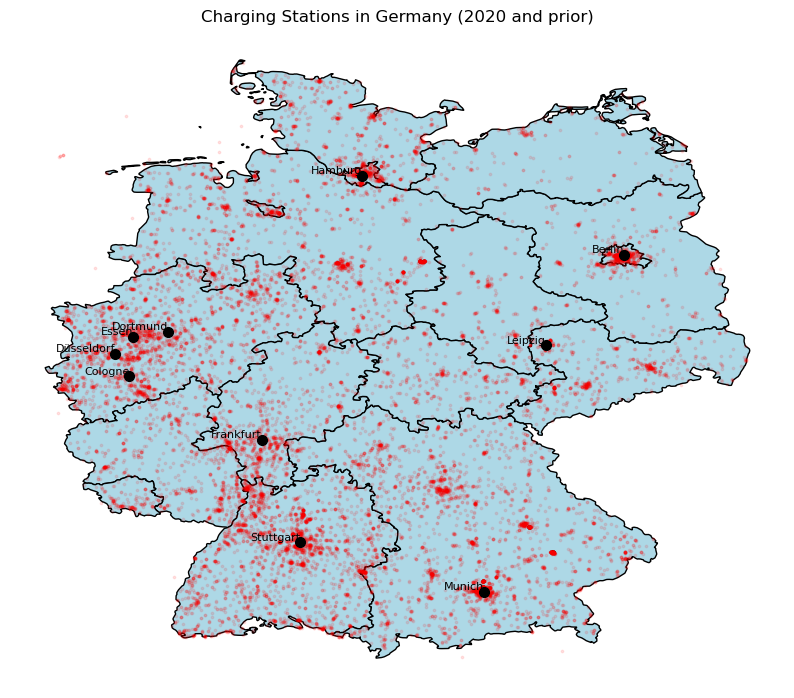

In [5]:
# Heatmap GER: 2020 and before #


#Shapefile Germany (Bundesländer)
GER_map = gpd.read_file('vg2500_bld.shp')

#read csv file charging data
charging_data = pd.read_csv('charging_data.csv')

# Convert column to datetime-Format
charging_data['inbetriebnahmedatum'] = pd.to_datetime(charging_data['inbetriebnahmedatum'])

# Filter: Data before and in 2020
charging_data_before_2020 = charging_data[charging_data['inbetriebnahmedatum'].dt.year <= 2020]

# Convert column to GeoDataFrame-Format
charging_geodf = gpd.GeoDataFrame(charging_data_before_2020, geometry=gpd.points_from_xy(charging_data_before_2020.laengengrad, charging_data_before_2020.breitengrad))

# Fisize and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 100))

# Plot GER map
GER_map.plot(ax=ax, color='lightblue', edgecolor='black')

# Definition GER 10 largest cities
cities = {
    'Berlin': (13.4049, 52.5200),
    'Hamburg': (9.9937, 53.5511),
    'Munich': (11.5819, 48.1351),
    'Cologne': (6.9603, 50.9375),
    'Frankfurt': (8.6821, 50.1109),
    'Stuttgart': (9.1829, 48.7758),
    'Düsseldorf': (6.7735, 51.2277),
    'Dortmund': (7.4686, 51.5136),
    'Essen': (7.0117, 51.4556),
    'Leipzig': (12.3874, 51.3438)
}

# Reduce alpha to increase visibility and prevent overplotting
charging_geodf.plot(ax=ax, color='red', markersize=3, alpha=0.1)

# Plotting GER 10 largest cities
for city, coords in cities.items():
    ax.plot(coords[0], coords[1], marker='o', color='black', markersize=7)
    ax.text(coords[0], coords[1], city, fontsize=8, ha='right', va='bottom')

# Title and disable axis
plt.title('Charging Stations in Germany (2020 and prior)')
ax.axis('off')

# Show heat map
plt.show()


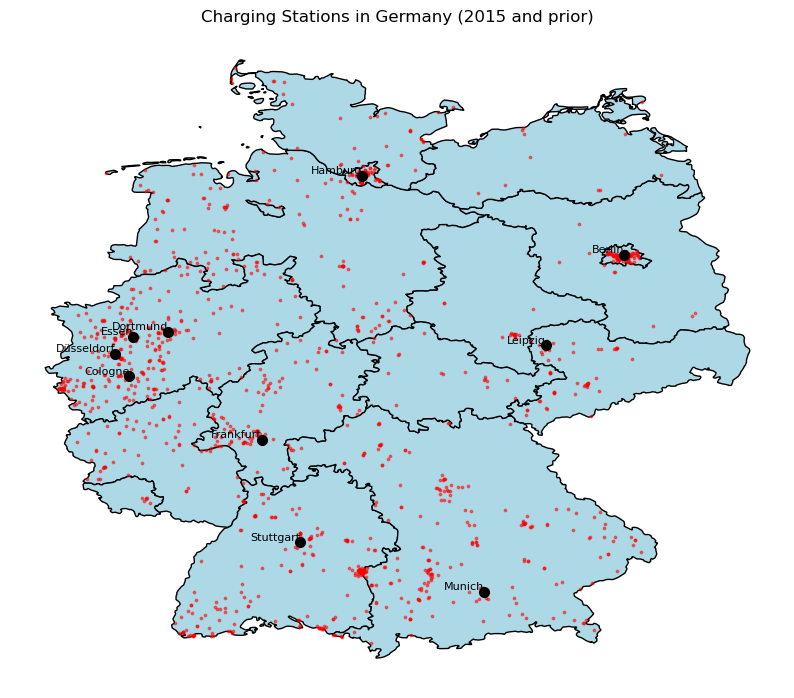

In [6]:
# Heatmap GER: 2015 and before #


#Shapefile Germany (Bundesländer)
GER_map = gpd.read_file('vg2500_bld.shp')

#read csv file charging data
charging_data = pd.read_csv('charging_data.csv')

# Convert column to datetime-Format
charging_data['inbetriebnahmedatum'] = pd.to_datetime(charging_data['inbetriebnahmedatum'])

# Filter: Data before and in 2015
charging_data_before_2015 = charging_data[charging_data['inbetriebnahmedatum'].dt.year <= 2015]

# Convert column to GeoDataFrame-Format
charging_geodf = gpd.GeoDataFrame(charging_data_before_2015, geometry=gpd.points_from_xy(charging_data_before_2015.laengengrad, charging_data_before_2015.breitengrad))

# Fisize and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 100))

# Plot GER map
GER_map.plot(ax=ax, color='lightblue', edgecolor='black')

# Definition GER 10 largest cities
cities = {
    'Berlin': (13.4049, 52.5200),
    'Hamburg': (9.9937, 53.5511),
    'Munich': (11.5819, 48.1351),
    'Cologne': (6.9603, 50.9375),
    'Frankfurt': (8.6821, 50.1109),
    'Stuttgart': (9.1829, 48.7758),
    'Düsseldorf': (6.7735, 51.2277),
    'Dortmund': (7.4686, 51.5136),
    'Essen': (7.0117, 51.4556),
    'Leipzig': (12.3874, 51.3438)
}

# Slightly increase alpha to increase visibility (there are not many points so overplotting is not that much of an issue)
charging_geodf.plot(ax=ax, color='red', markersize=3, alpha=0.5)

# Plotting GER 10 largest cities
for city, coords in cities.items():
    ax.plot(coords[0], coords[1], marker='o', color='black', markersize=7)
    ax.text(coords[0], coords[1], city, fontsize=8, ha='right', va='bottom')

# Title and disable axis
plt.title('Charging Stations in Germany (2015 and prior)')
ax.axis('off')

# Show heat map
plt.show()


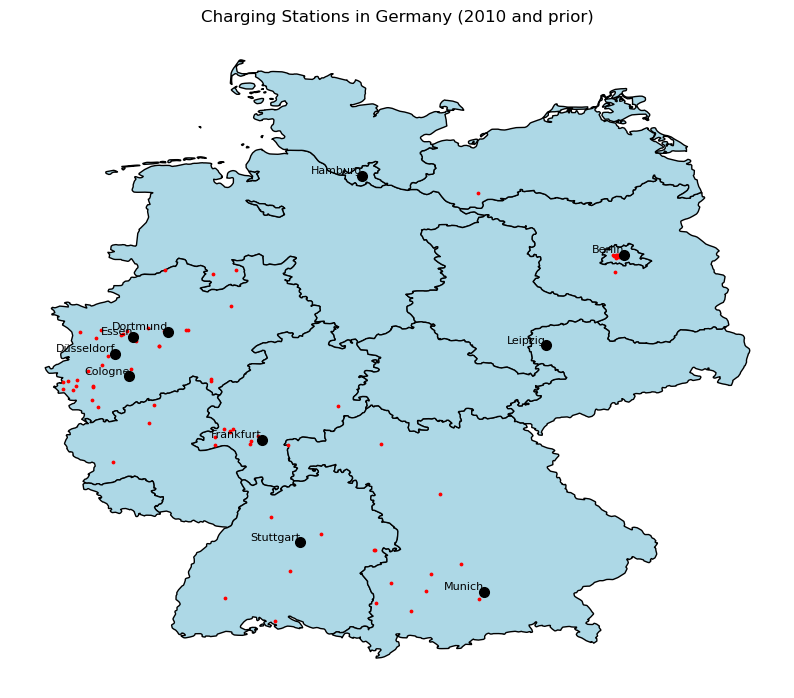

In [7]:
# Heatmap GER: 2010 and before #


#Shapefile Germany (Bundesländer)
GER_map = gpd.read_file('vg2500_bld.shp')

#read csv file charging data
charging_data = pd.read_csv('charging_data.csv')

# Convert column to datetime-Format
charging_data['inbetriebnahmedatum'] = pd.to_datetime(charging_data['inbetriebnahmedatum'])

# Filter: Data before 2010
charging_data_before_2010 = charging_data[charging_data['inbetriebnahmedatum'].dt.year <=2010]

# Convert column to GeoDataFrame-Format
charging_geodf = gpd.GeoDataFrame(charging_data_before_2010, geometry=gpd.points_from_xy(charging_data_before_2010.laengengrad, charging_data_before_2010.breitengrad))

# Fisize and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 100))

# Plot GER map
GER_map.plot(ax=ax, color='lightblue', edgecolor='black')

# Definition GER 10 largest cities
cities = {
    'Berlin': (13.4049, 52.5200),
    'Hamburg': (9.9937, 53.5511),
    'Munich': (11.5819, 48.1351),
    'Cologne': (6.9603, 50.9375),
    'Frankfurt': (8.6821, 50.1109),
    'Stuttgart': (9.1829, 48.7758),
    'Düsseldorf': (6.7735, 51.2277),
    'Dortmund': (7.4686, 51.5136),
    'Essen': (7.0117, 51.4556),
    'Leipzig': (12.3874, 51.3438)
}

# Increase alpha to increase visibility (overplotting is no issue since there are only a few points)
charging_geodf.plot(ax=ax, color='red', markersize=3, alpha=1)

# Plotting GER 10 largest cities
for city, coords in cities.items():
    ax.plot(coords[0], coords[1], marker='o', color='black', markersize=7)
    ax.text(coords[0], coords[1], city, fontsize=8, ha='right', va='bottom')

# Title and disable axis
plt.title('Charging Stations in Germany (2010 and prior)')
ax.axis('off')

# Show heat map
plt.show()
